In [1]:
# Import the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.dates as md
from haversine import haversine
import folium
from folium.plugins import HeatMap

In [2]:
# load the data available at: https://www.kaggle.com/datasets/airbnb/seattle

listing_df = pd.read_csv('listings.csv')
calendar_df = pd.read_csv('calendar.csv')
reviews_df = pd.read_csv('reviews.csv')

In [3]:
listing_df

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.30
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.00
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN


In [4]:
listing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3818.0,5.550111e+06,2.962660e+06,3.335000e+03,3.258256e+06,6.118244e+06,8.035127e+06,1.034016e+07
scrape_id,3818.0,2.016010e+13,0.000000e+00,2.016010e+13,2.016010e+13,2.016010e+13,2.016010e+13,2.016010e+13
host_id,3818.0,1.578556e+07,1.458382e+07,4.193000e+03,3.275204e+06,1.055814e+07,2.590309e+07,5.320861e+07
host_listings_count,3816.0,7.157757e+00,2.862815e+01,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,5.020000e+02
host_total_listings_count,3816.0,7.157757e+00,2.862815e+01,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,5.020000e+02
latitude,3818.0,4.762896e+01,4.305195e-02,4.750509e+01,4.760942e+01,4.762360e+01,4.766269e+01,4.773336e+01
longitude,3818.0,-1.223331e+02,3.174451e-02,-1.224172e+02,-1.223543e+02,-1.223289e+02,-1.223108e+02,-1.222406e+02
accommodates,3818.0,3.349398e+00,1.977599e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
bathrooms,3802.0,1.259469e+00,5.903691e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
bedrooms,3812.0,1.307712e+00,8.833949e-01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00


In [5]:
listing_df.describe(include=['O']).T

,count,unique,top,freq
listing_url,3818,3818,https://www.airbnb.com/rooms/241032,1
last_scraped,3818,1,2016-01-04,3818
name,3818,3792,Capitol Hill Apartment,3
summary,3641,3478,This is a modern fully-furnished studio apartm...,15
space,3249,3119,"*Note: This fall, there will be major renovati...",14
...,...,...,...,...
jurisdiction_names,3818,1,WASHINGTON,3818
instant_bookable,3818,2,f,3227
cancellation_policy,3818,3,strict,1417
require_guest_profile_picture,3818,2,f,3497


In [6]:
calendar_df

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [7]:
calendar_df.describe(include='all')

,listing_id,date,available,price
count,1.393570e+06,1393570,1393570,934542
unique,NaN,365,2,669
top,NaN,2016-01-04,t,$150.00
freq,NaN,3818,934542,36646
mean,5.550111e+06,NaN,NaN,NaN
std,2.962274e+06,NaN,NaN,NaN
min,3.335000e+03,NaN,NaN,NaN
25%,3.258213e+06,NaN,NaN,NaN
50%,6.118244e+06,NaN,NaN,NaN
75%,8.035212e+06,NaN,NaN,NaN


In [8]:
reviews_df

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicación, cerca de todo lo atractivo del..."
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si..."


# What is the most expensive time of year to rent an Airbnb listing in Seattle?

From the dataset calendar_df I am going to take the variables price and date in order to check their datatypes and clean the data

In [9]:
calendar_df.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [10]:
# date correction
calendar_df['date'] = pd.to_datetime(calendar_df['date'])

#Price correction
calendar_df['price'] = calendar_df['price'].str.replace('$','')
calendar_df['price'] = calendar_df['price'].str.replace(',','')
calendar_df['price'] = calendar_df['price'].replace('',np.nan)
calendar_df['price'] = calendar_df['price'].astype(float)


C:\Users\dsvel\AppData\Local\Temp\ipykernel_13348\1481251441.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar_df['price'] = calendar_df['price'].str.replace('$','')


In [11]:
calendar_df.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

In [12]:
calendar_df['date'].min()

Timestamp('2016-01-04 00:00:00')

In [13]:
calendar_df['date'].max()

Timestamp('2017-01-02 00:00:00')

In [14]:
df_grouped_daily = calendar_df[calendar_df['available']=='t'].groupby('date').agg({'price':['mean','min','max'],'listing_id':['count']})
df_grouped_daily.columns = df_grouped_daily.columns.map('_'.join)
df_grouped_daily.reset_index(inplace=True)
df_grouped_daily

,date,price_mean,price_min,price_max,listing_id_count
0,2016-01-04,122.085879,25.0,975.0,1735
1,2016-01-05,120.681307,25.0,950.0,1867
2,2016-01-06,120.928258,25.0,950.0,1826
3,2016-01-07,120.958896,22.0,950.0,1776
4,2016-01-08,127.640853,20.0,950.0,1782
...,...,...,...,...,...
360,2016-12-29,138.045503,20.0,1650.0,2835
361,2016-12-30,144.738380,20.0,1650.0,2840
362,2016-12-31,145.698146,20.0,1650.0,2859
363,2017-01-01,138.126968,20.0,1000.0,2922


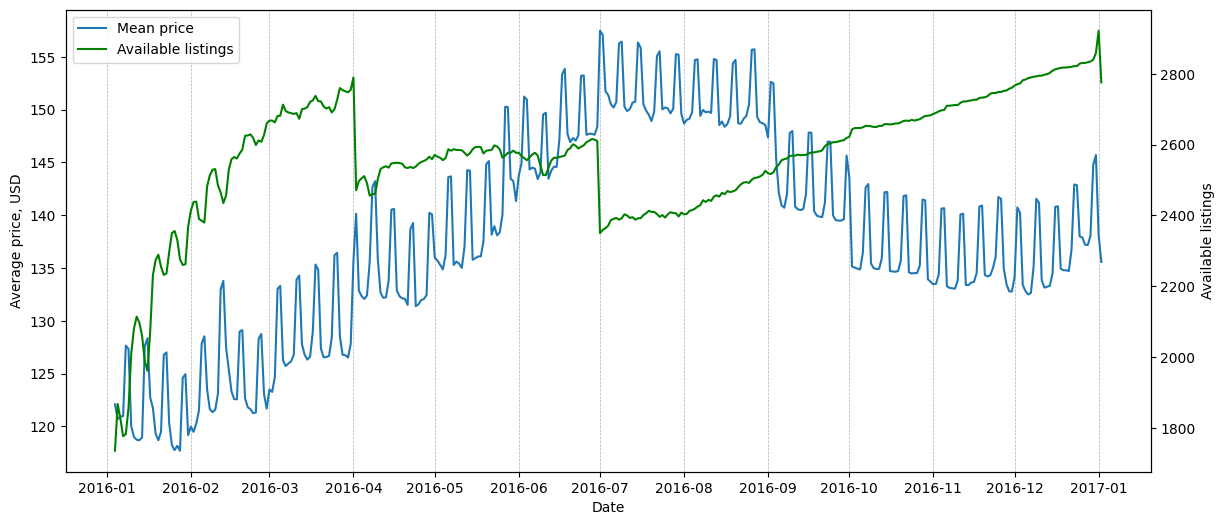

In [15]:
fig, ax = plt.subplots(figsize = (14, 6))

lns1 = sns.lineplot(x="date", y="price_mean", data=df_grouped_daily,ax=ax,label='Mean price')
ax.xaxis.set_major_locator(md.MonthLocator())
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m'))
ax.tick_params(axis='both', which='major', labelsize=10)
ax.grid(axis='x',linestyle='--',linewidth=0.5)
plt.xlabel('Date')
plt.ylabel('Average price, USD')
ax2 = plt.twinx()
lns2 = sns.lineplot(x="date", y="listing_id_count",color='green',data=df_grouped_daily, ax=ax2, label='Available listings')
plt.ylabel('Available listings')

lns = lns1.lines+lns2.lines
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs)
ax.get_legend().remove()

plt.savefig('time_series_price.png', dpi=300, bbox_inches='tight')

# What is the top 10 most expensive neighborhoods?

From the dataset listing_df I am going to take the variables id, neighbourhood and price to answer this question.

In [16]:
df_neighbourhood_filtered = listing_df[['id','neighbourhood','price']]
df_neighbourhood_filtered

,id,neighbourhood,price
0,241032,Queen Anne,$85.00
1,953595,Queen Anne,$150.00
2,3308979,Queen Anne,$975.00
3,7421966,Queen Anne,$100.00
4,278830,Queen Anne,$450.00
...,...,...,...
3813,8101950,Fremont,$359.00
3814,8902327,Portage Bay,$79.00
3815,10267360,NaN,$93.00
3816,9604740,NaN,$99.00


In [17]:
df_neighbourhood_filtered['neighbourhood'].nunique()

81

In [18]:
df_neighbourhood_filtered.isna().sum()*100/len(listing_df)

id                0.000000
neighbourhood    10.895757
price             0.000000
dtype: float64

Given the fact that there is 10.89% of null values in the neighbourhood field, I am going to drop these values

In [19]:
df_neighbourhood_filtered = df_neighbourhood_filtered.dropna(subset=['neighbourhood'])

In [20]:
df_neighbourhood_filtered.isna().sum()*100/len(df_neighbourhood_filtered)

id               0.0
neighbourhood    0.0
price            0.0
dtype: float64

In [21]:
#Price correction
df_neighbourhood_filtered['price'] = df_neighbourhood_filtered['price'].str.replace('$','')
df_neighbourhood_filtered['price'] = df_neighbourhood_filtered['price'].str.replace(',','')
df_neighbourhood_filtered['price'] = df_neighbourhood_filtered['price'].replace('',np.nan)
df_neighbourhood_filtered['price'] = df_neighbourhood_filtered['price'].astype(float)

C:\Users\dsvel\AppData\Local\Temp\ipykernel_13348\38082367.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_neighbourhood_filtered['price'] = df_neighbourhood_filtered['price'].str.replace('$','')
C:\Users\dsvel\AppData\Local\Temp\ipykernel_13348\38082367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neighbourhood_filtered['price'] = df_neighbourhood_filtered['price'].str.replace('$','')
C:\Users\dsvel\AppData\Local\Temp\ipykernel_13348\38082367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [22]:
df_neighbourhood_filtered.dtypes

id                 int64
neighbourhood     object
price            float64
dtype: object

In [23]:
df_neighbourhood =  df_neighbourhood_filtered.groupby('neighbourhood').agg({'price':'mean'}).reset_index().sort_values(by='price',ascending=False)

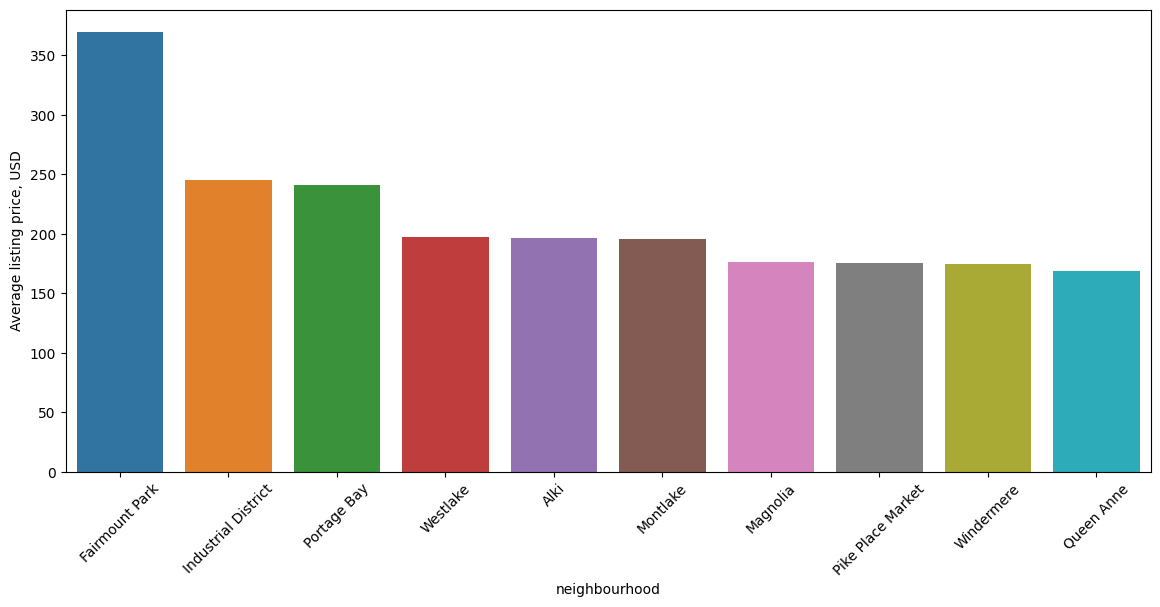

In [24]:
fig, ax = plt.subplots(figsize = (14, 6))
barplot_obj = sns.barplot(data=df_neighbourhood.head(10), x="neighbourhood", y="price",ax=ax)
plt.ylabel('Average listing price, USD')
plt.xticks(rotation=45)

plt.savefig('price_neighborhoods_top10.png', dpi=300, bbox_inches='tight')

# What is the relationship between the distance to downtown Seattle and the price of an Airbnb listing?

From the dataset listing_df I am going to take the variables id, latitud, longitud and price to answer this question.

In [25]:
df_heatmap_price = listing_df[['id','latitude','longitude','price']]

In [26]:
#Price correction
df_heatmap_price['price'] = df_heatmap_price['price'].str.replace('$','')
df_heatmap_price['price'] = df_heatmap_price['price'].str.replace(',','')
df_heatmap_price['price'] = df_heatmap_price['price'].replace('',np.nan)
df_heatmap_price['price'] = df_heatmap_price['price'].astype(float)

C:\Users\dsvel\AppData\Local\Temp\ipykernel_13348\1081932764.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_heatmap_price['price'] = df_heatmap_price['price'].str.replace('$','')
C:\Users\dsvel\AppData\Local\Temp\ipykernel_13348\1081932764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heatmap_price['price'] = df_heatmap_price['price'].str.replace('$','')
C:\Users\dsvel\AppData\Local\Temp\ipykernel_13348\1081932764.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [27]:
# Set the initial location of the map (downtown Seatlle)
seattle_coords = [47.60526541347886, -122.33407811284198]
m = folium.Map(location=seattle_coords, zoom_start=12)

# Create Heatmap Layer
heatmap_layer = folium.FeatureGroup(name='Heatmap')
HeatMap(df_heatmap_price[['latitude', 'longitude', 'price']].values, name='Price Heatmap',min_opacity=0.3,radius=8, blur=5).add_to(m)
m

In [28]:
distance = lambda row: haversine((row['latitude'], row['longitude']), (47.60526541347886, -122.33407811284198), unit='km')

df_heatmap_price['distance_dt_km'] = df_heatmap_price.apply(distance, axis=1)

C:\Users\dsvel\AppData\Local\Temp\ipykernel_13348\389426324.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heatmap_price['distance_dt_km'] = df_heatmap_price.apply(distance, axis=1)


<Axes: xlabel='distance_dt_km', ylabel='price'>

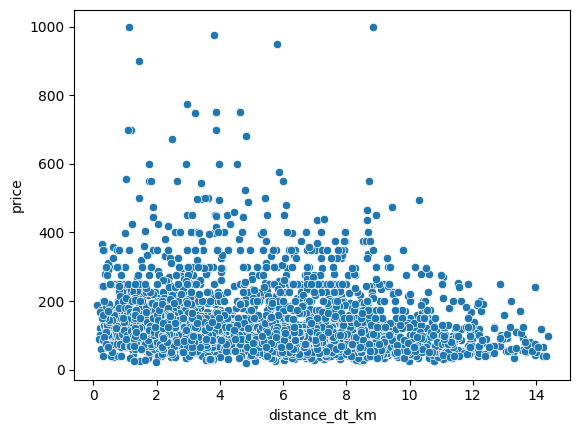

In [29]:
sns.scatterplot(data=df_heatmap_price, x='distance_dt_km', y='price')

In [30]:
# calculate the correlation between x and y
correlation = df_heatmap_price['distance_dt_km'].corr(df_heatmap_price['price'])
print(correlation) # output: 0.8713805223934972

-0.14189665268981
